In [2]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

# Save Image

In [37]:
with h5py.File('../home/Data/train/image/brain_acc4_1.h5', 'r') as file:
    print("Keys in the file:", list(file.keys()))
    keys = list(file.keys())

Keys in the file: ['image_grappa', 'image_input', 'image_label']


In [44]:
n_data = [118, 118, 120]
acc_factor = [4, 5, 8]

for i, n in enumerate(n_data):
    for j in range(n):
        with h5py.File(f'../home/Data/train/image/brain_acc{acc_factor[i]}_{j+1}.h5', 'r') as file:
            keys = list(file.keys())
            # List all groups and datasets in the file
            for key in keys:
                data = file[key][:]
                for k in range(len(data)):
                    image = data[k]
                    image -= image.min()
                    image /= image.max()
                    image *= 255  # Scale to [0, 255]
                    
                    # Convert to uint8 (optional, for image file compatibility)
                    image = image.astype(np.uint8)

                    # Save the image
                    plt.imsave(f'image/brain_acc{acc_factor[i]}_{j+1}_{key}_{k}.png', image, cmap='gray')

In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

n_train_data = [118, 118, 120]
n_data = [17, 17, 17]
acc_factor = [4, 5, 8]

for i, n in enumerate(n_data):
    for j in range(n):
        with h5py.File(f'../home/Data/val/image/brain_acc{acc_factor[i]}_{j+1+n_train_data[i]}.h5', 'r') as file:
            keys = list(file.keys())
            # List all groups and datasets in the file
            for key in keys:
                data = file[key][:]
                for k in range(len(data)):
                    image = data[k]
                    image -= image.min()
                    image /= image.max()
                    image *= 255  # Scale to [0, 255]
                    
                    # Convert to uint8 (optional, for image file compatibility)
                    image = image.astype(np.uint8)

                    # Save the image
                    plt.imsave(f'image/val/brain_acc{acc_factor[i]}_{j+1+n_train_data[i]}_{key}_{k}.png', image, cmap='gray')

In [5]:
for i in range(58):
    with h5py.File(f'../home/Data/leaderboard/acc5/image/brain_test{i+1}.h5', 'r') as file:
        keys = list(file.keys())
        # List all groups and datasets in the file
        for key in keys:
            data = file[key][:]
            for k in range(len(data)):
                image = data[k]
                image -= image.min()
                image /= image.max()
                image *= 255  # Scale to [0, 255]
                
                # Convert to uint8 (optional, for image file compatibility)
                image = image.astype(np.uint8)

                # Save the image
                plt.imsave(f'image/leaderboard/brain_acc5_test{i+1}_{key}_{k}.png', image, cmap='gray')
    with h5py.File(f'../home/Data/leaderboard/acc9/image/brain_test{i+1}.h5', 'r') as file:
        keys = list(file.keys())
        # List all groups and datasets in the file
        for key in keys:
            data = file[key][:]
            for k in range(len(data)):
                image = data[k]
                image -= image.min()
                image /= image.max()
                image *= 255  # Scale to [0, 255]
                
                # Convert to uint8 (optional, for image file compatibility)
                image = image.astype(np.uint8)

                # Save the image
                plt.imsave(f'image/leaderboard/brain_acc9_test{i+1}_{key}_{k}.png', image, cmap='gray')
    

# k-space Masks

## k-space Visualization

['kspace', 'mask']
<HDF5 dataset "mask": shape (396,), type "<f4">


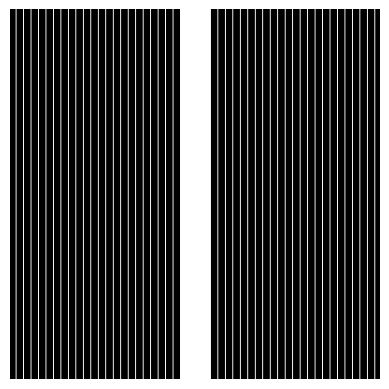

In [29]:
file = h5py.File(f'../home/Data/train/kspace/brain_acc8_1.h5', 'r')
keys = list(file.keys())
print(keys)
data = file['mask']
print(data)
mask = np.array([list(data) for i in range(len(data))])
plt.imshow(mask, cmap='gray')
plt.axis('off')
file.close()

In [63]:
# Train Data
n_data = [118, 118, 120]
acc_factor = [4, 5, 8]

for i, n in enumerate(n_data):
    data = []
    for j in range(n):
        with h5py.File(f'../home/Data/train/kspace/brain_acc{acc_factor[i]}_{j+1}.h5', 'r') as file:
            data.append(len(file['mask'][:]))
    print(np.unique(np.array(data), return_counts=True))
    # plt.imshow(data)

(array([392, 396]), array([  6, 112]))
(array([392, 396]), array([  5, 113]))
(array([392, 396]), array([  6, 114]))


In [81]:
# Val Data
n_train_data = [118, 118, 120]
acc_factor = [4, 5, 8]

for i, n in enumerate(n_data):
    data = []
    for j in range(n):
        with h5py.File(f'../home/Data/val/kspace/brain_acc{acc_factor[i]}_{j+1+n_train_data[i]}.h5', 'r') as file:
            data.append(len(file['mask'][:]))
    print(np.unique(np.array(data), return_counts=True))

(array([396]), array([17]))
(array([392, 396]), array([ 1, 16]))
(array([392, 396]), array([ 2, 15]))


In [85]:
# Leaderboard Data
n_data = [58, 58]
acc_factor = [5, 9]

for i, n in enumerate(n_data):
    data = []
    for j in range(n):
        with h5py.File(f'../home/Data/leaderboard/acc{acc_factor[i]}/kspace/brain_test{j+1}.h5', 'r') as file:
            data.append(len(file['mask'][:]))
    print(np.unique(np.array(data), return_counts=True))

(array([392, 396]), array([12, 46]))
(array([392, 396]), array([12, 46]))


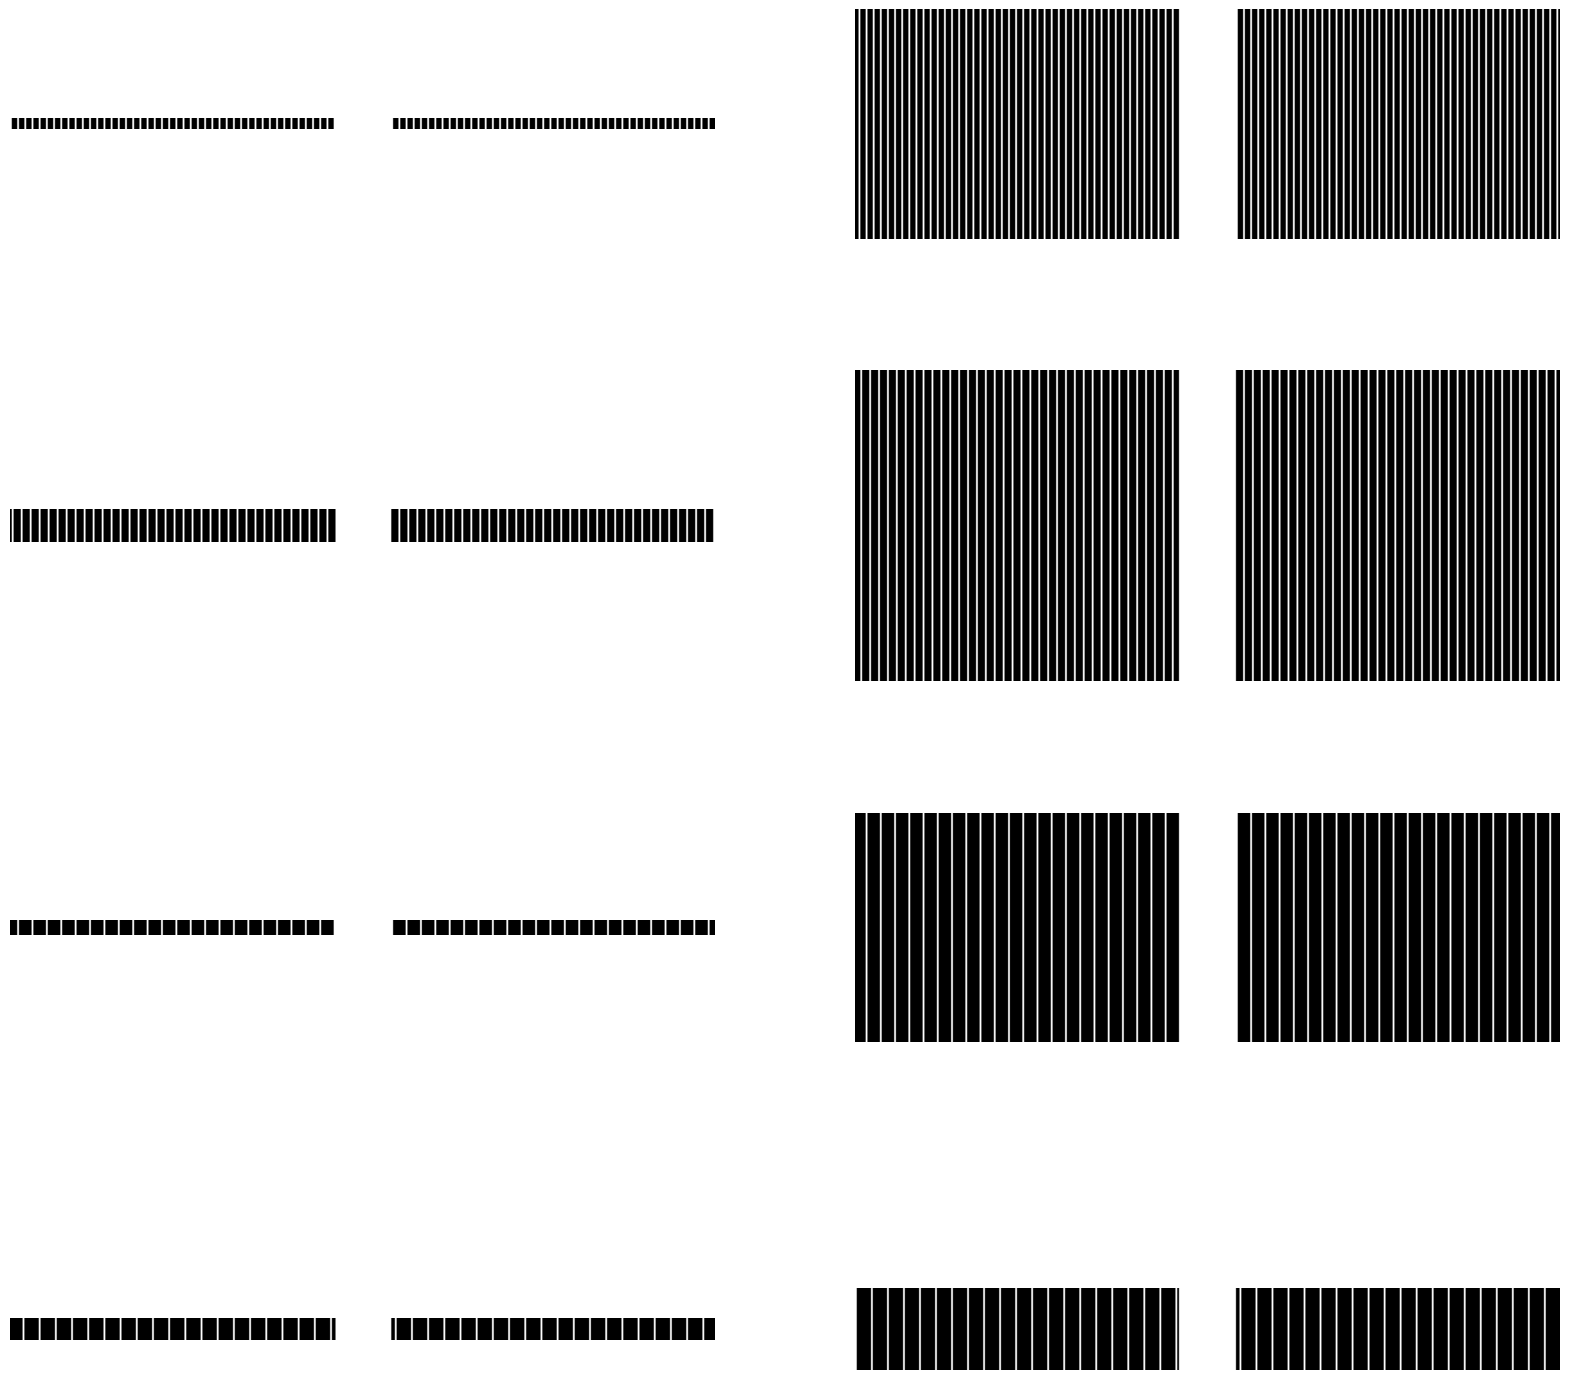

In [2]:
n_data = [118, 118, 120]
n_data_val = [17, 17, 17]
acc_factor = [4, 5, 8]

mask_392 = [np.array([]) for i in range(4)]
mask_396 = [np.array([]) for i in range(4)]

for i, n in enumerate(n_data):
    for j in range(n):
        with h5py.File(f'../home/Data/train/kspace/brain_acc{acc_factor[i]}_{j+1}.h5', 'r') as file:
            mask = file['mask'][:]
            if len(mask) == 392:
                mask_392[i] = np.append(mask_392[i], mask)
            if len(mask) == 396:
                mask_396[i] = np.append(mask_396[i], mask)
for i, n in enumerate(n_data_val):
    for j in range(n):
        with h5py.File(f'../home/Data/val/kspace/brain_acc{acc_factor[i]}_{j+1+n_data[i]}.h5', 'r') as file:
            mask = file['mask'][:]
            if len(mask) == 392:
                mask_392[i] = np.append(mask_392[i], mask)
            if len(mask) == 396:
                mask_396[i] = np.append(mask_396[i], mask)

for i in range(58):
    with h5py.File(f'../home/Data/leaderboard/acc5/kspace/brain_test{i+1}.h5', 'r') as file:
        mask = file['mask'][:]
        if len(mask) == 392:
            mask_392[1] = np.append(mask_392[1], mask)
        if len(mask) == 396:
            mask_396[1] = np.append(mask_396[1], mask)
for i in range(58):
    with h5py.File(f'../home/Data/leaderboard/acc9/kspace/brain_test{i+1}.h5', 'r') as file:
        mask = file['mask'][:]
        if len(mask) == 392:
            mask_392[3] = np.append(mask_392[3], mask)
        if len(mask) == 396:
            mask_396[3] = np.append(mask_396[3], mask)

fig, ax = plt.subplots(4, 2, figsize = (20, 20))
for i in range(4):
    ax[i, 0].imshow(mask_392[i].reshape(-1, 392), cmap = 'gray')
    ax[i, 0].axis('off')
    ax[i, 1].imshow(mask_396[i].reshape(-1, 396), cmap = 'gray')
    ax[i, 1].axis('off')
    ax[i, 0].imshow(mask_392[i].reshape(-1, 392), cmap = 'gray')
    ax[i, 0].axis('off')
    ax[i, 1].imshow(mask_396[i].reshape(-1, 396), cmap = 'gray')
    ax[i, 1].axis('off')

In [12]:
mask_value_392 = [mask_392[i].reshape(-1,392)[0] for i in range(4)]
mask_value_396 = [mask_396[i].reshape(-1,396)[0] for i in range(4)]
acc_list = [4, 5, 8, 9]
print("\t392\t396")
for i in range(4):
    print(f"acc{acc_list[i]}\t{int(mask_value_392[i].sum())}\t{int(mask_value_396[i].sum())}")

	392	396
acc4	122	123
acc5	103	104
acc8	77	77
acc9	71	73


In [24]:
df = pd.DataFrame(mask_value_392).astype(int)
df[:]

,0,1,2,3,4,5,6,7,8,9,...,382,383,384,385,386,387,388,389,390,391
0,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
df.iloc[:,]

0    0
1    1
2    0
3    0
Name: 1, dtype: int64

In [41]:
k = 18
for i in range(4):
    print(mask_value_392[i][196-k:196+k].astype(int))

[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [44]:
k = 18
for i in range(4):
    print(mask_value_396[i][198-k:198+k].astype(int))

[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


## k-space Mask Creation

In [65]:
mask_392_m = []
mask_396_m = []
acc_list = [4, 5, 8, 9]

for acc in acc_list:
    a = np.array([int((i-196)%acc == 0) for i in range(392)])
    a[181:212] = 1
    mask_392_m.append(a)

    a = np.array([int((i-198)%acc == 0) for i in range(396)])
    a[182:214] = 1
    mask_396_m.append(a)

k = 18
for i in range(4):
    print(mask_value_392[i][-2*k:].astype(int))
    print(mask_392_m[i][-2*k:].astype(int))
    print()
for i in range(4):
    print(mask_value_396[i][-2*k:].astype(int))
    print(mask_396_m[i][-2*k:].astype(int))
    print()

[1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]

[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]

[0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0]
[0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0]

[0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0

In [72]:
for i in range(len(mask_value_392)):
    print(np.abs(mask_value_392[i]-mask_392_m[i]).sum())
    print(np.abs(mask_value_396[i]-mask_396_m[i]).sum())

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
mask_392_m = []
mask_396_m = []
acc_list = list(range(1, 11))

for acc in acc_list:
    a = np.array([int((i-196)%acc == 0) for i in range(392)])
    a[181:212] = 1
    mask_392_m.append(a)

    a = np.array([int((i-198)%acc == 0) for i in range(396)])
    a[182:214] = 1
    mask_396_m.append(a)

In [6]:
file = h5py.File(f'../home/Data/train/kspace/brain_acc8_1.h5', 'r')
keys = list(file.keys())
print(keys)
data = file['kspace']
print(type(data))
print(data.shape[-1])
file.close()

['kspace', 'mask']
<class 'h5py._hl.dataset.Dataset'>
396


# SSIM Visualization

- ${\rm SSIM}$을 구하는 상황은 크게 세가지: train, val, leaderboard_eval
- train, val, leaderboard_eval에서 쓰는 방법이 약간씩 다른데, $c_1, c_2, k_1, k_2, {\rm window\,size}$ 등은 동일함
- val에서는 h5py들의 ${\rm SSIM}$ 평균을 내고, leaderboard_eval에서는 slice들의 ${\rm SSIM}$ 평균을 냄
- leaderboard_eval에서는 일정값 이하의 픽셀은 전부 0으로 바꿔준 후 ${\rm SSIM}$을 구함. train과 val에서는 그냥 구함

- ${\rm SSIM}$은 $7\times7\,{\rm window}$가 움직이며 계산됨.
- Image가 $384\times384$이므로 ${\rm SSIM}$은 $378\times378$

## SSIM by pixel

Mean SSIM of the Image:0.024096215143799782


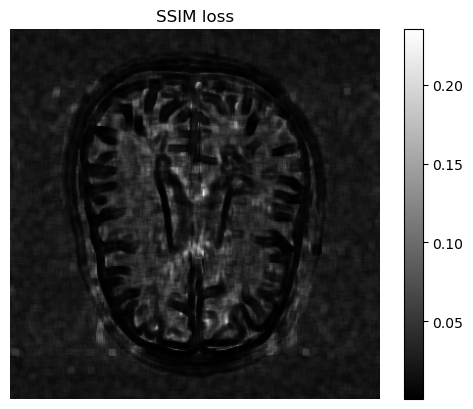

In [16]:
# 각 좌표의 SSIM을 구해주는 코드
from graph import SSIM_by_pixel
import matplotlib.pyplot as plt

netname = 'test_6125_59_ver2'
image_fname = '../../home/Data/train/image/brain_acc4_1.h5'
kspace_fname = '../../home/Data/train/kspace/brain_acc4_1.h5'
dataslice = 1

mask_args = {'acc':4, 'mask_mode':'equispaced'}

ssim_graph = SSIM_by_pixel(netname, image_fname, kspace_fname, dataslice, mask_args)
plt.imshow(ssim_graph, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('SSIM loss')
print(f"Mean SSIM of the Image:{ssim_graph.mean()}")

/home/mjk32384/root/FastMRI_challenge/graph.py:152: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(args.exp_dir / 'best_model.pt', map_location='cpu')

Mean SSIM of the Image:0.03591387718915939


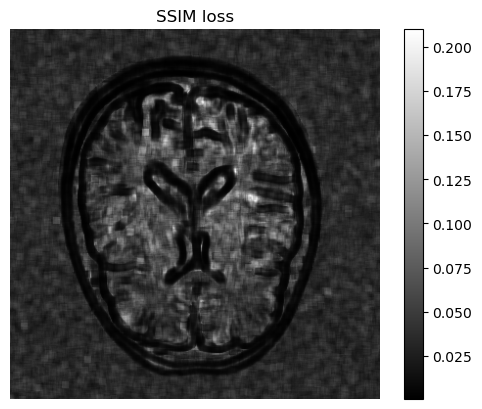

In [1]:
# 각 좌표의 SSIM을 구해주는 코드
from graph import SSIM_by_pixel, parse
import matplotlib.pyplot as plt

netname = 'test_6125_59_ver2'
image_fname = '../../home/Data/train/image/brain_acc4_10.h5'
kspace_fname = '../../home/Data/train/kspace/brain_acc4_10.h5'
dataslice = 1

mask_mode = 'equispaced'
mask_acc = 5

args = parse(['-n', netname, '--mask_mode', mask_mode, '--acc_weight', f'{{"{mask_acc}":"1"}}'])
args.acc_weight = {int(k):int(v) for k, v in args.acc_weight.items()}
args.image_fname = image_fname
args.kspace_fname = kspace_fname
args.dataslice = dataslice


ssim_graph = SSIM_by_pixel(args)
plt.imshow(ssim_graph, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('SSIM loss')
print(f"Mean SSIM of the Image:{ssim_graph.mean()}")

## SSIM Mask Visualization

In [ ]:
# SSIM mask 형태를 png 파일로 저장

import cv2
import h5py
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

image_directory_list = [Path('../../home/Data/train'),
                   Path('../../home/Data/val'),
                   Path('../../home/Data/leaderboard/acc5'),
                   Path('../../home/Data/leaderboard/acc9')]

for directory in image_directory_list:
    image_files = sorted(list(Path(directory / "image").iterdir()))
    for image_dir in image_files:
        with h5py.File(image_dir, "r") as hf:
            for dataslice in range(hf['image_label'].shape[0]):
                target = hf['image_label'][dataslice]
                mask = np.zeros(target.shape)
                mask[target>5e-5] = 1
                kernel = np.ones((3, 3), np.uint8)
                mask = cv2.erode(mask, kernel, iterations=1)
                mask = cv2.dilate(mask, kernel, iterations=15)
                mask = cv2.erode(mask, kernel, iterations=14)

                plt.imshow(target, cmap='gray')
                plt.imshow(mask, cmap='Reds', alpha = mask/2)
                plt.axis('off')
                plt.savefig(f'../image/{str(directory).split("/",4)[-1]}/{image_dir.name.split(".")[0]}_{dataslice}.png', bbox_inches='tight', pad_inches=0)
                plt.clf()
plt.close('all')

- leaderboard_eval에서는 붉은색으로 칠해진 부분을 제외하고는 전부 0으로 놓고 ${\rm SSIM}$ 계산
- training에서도 mask를 씌우고 training 하는거는 어떨까?

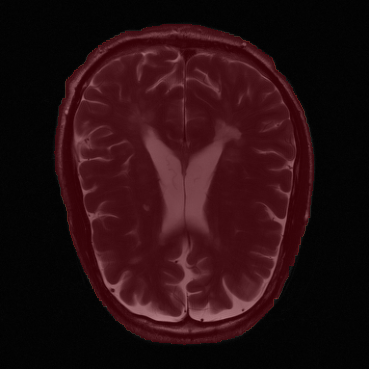

In [5]:
from PIL import Image

image_path = "../image/train/brain_acc4_1_0.png"
Image.open(image_path)

- 모든 이미지를 확인해본 결과, mask는 모두 적절하게 생성된 것으로 보인다.

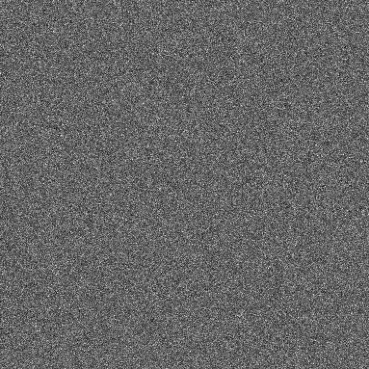

In [10]:
from PIL import Image

image_path = "../image/train/brain_acc4_1_15.png"
Image.open(image_path)

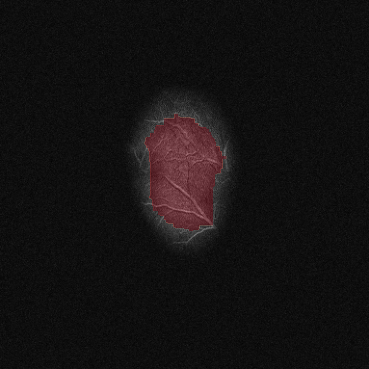

In [12]:
image_path = "../image/train/brain_acc4_1_12.png"
Image.open(image_path)

- 간혹 이런 이미지들도 섞여 있는데 ,이런 이미지들은 SSIM loss가 커서 gradient가 크고 training에 큰 영향을 미치는데, 실제로는 도움이 안됨
- 이런 이미지들의 SSIM mask는 1인 부분이 매우 작거나 없음.
- 그래서 leaderboard_eval에서 사용한 SSIM mask를 training, validation에도 이용하면 좋을 듯?
    - 그래서 구현했음:
    - args.use_SSIM_mask_train = True이면 train에 mask 적용.
    - validation에서 mask 적용 안된 SSIM은 val_loss_log.npy에, mask 적용된 SSIM은 val_loss_mask_log.npy에 저장됨

## SSIM by slice

In [5]:
from graph import parse, SSIM_by_slice
import matplotlib.pyplot as plt
import numpy as np
import pickle

def flatten_list(nested_list):
    return_list = []
    for item in nested_list:
        if type(item) == list:
            return_list += flatten_list(item)
        else:
            return_list.append(item)
    return return_list

net_name = 'test_6125_all_ssim_mask'
data_path_val = '../../home/Data/val/'
acc_weight = '{"9": "1"}'

args = parse(['-n', net_name, '-t', data_path_val, '--acc_weight', acc_weight])
args.acc_weight = {int(k):int(v) for k, v in args.acc_weight.items()}

ssim = []
ssim_log = []

args.use_SSIM_mask = False
ssim_losses, val_time = SSIM_by_slice(args)
ssim_log.append(ssim_losses)
ssim.append(np.array(flatten_list([list(dictionary.values()) for dictionary in ssim_losses.values()])))

args.use_SSIM_mask = True
ssim_losses, val_time = SSIM_by_slice(args)
ssim_log.append(ssim_losses)
ssim.append(np.array(flatten_list([list(dictionary.values()) for dictionary in ssim_losses.values()])))

with open('test/ssim_log.pkl', 'wb') as f:
    pickle.dump(ssim_log, f)

Current cuda device  0


/home/mjk32384/root/FastMRI_challenge/graph.py:198: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(args.exp_dir / 'best_model.pt', map_location='cpu')

Current cuda device  0


/opt/conda/envs/FastMRI/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:269: RuntimeWarning: invalid value encountered in divide
  S = (A1 * A2) / D


In [15]:
from graph import parse, SSIM_by_slice
import matplotlib.pyplot as plt
import numpy as np
import pickle
with open('test/ssim_log.pkl', 'rb') as f:
    ssim_log = pickle.load(f)

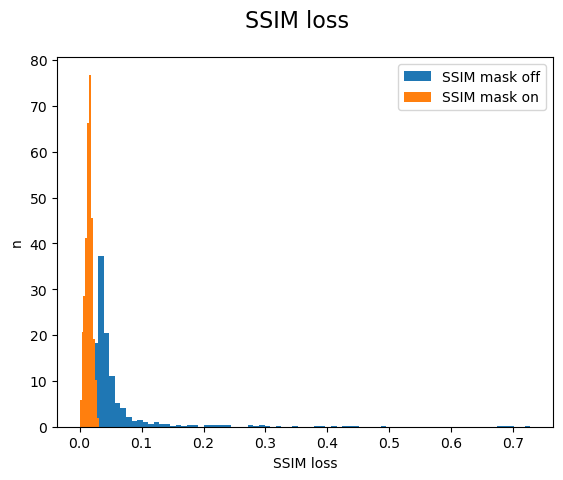

In [18]:
ssim_values = []
ssim_values.append(np.array(flatten_list([list(dictionary.values()) for dictionary in ssim_log[0].values()])))
ssim_values.append(np.array(flatten_list([list(dictionary.values()) for dictionary in ssim_log[1].values()])))

plt.hist(ssim_values[0], density = True, bins = 80, label = 'SSIM mask off')
plt.hist(ssim_values[1], density = True, label = 'SSIM mask on')
plt.suptitle('SSIM loss', fontsize=16)
plt.xlabel('SSIM loss')
plt.ylabel('n')
plt.legend()

- valdiation dataset 전체에 대해서 acc=5로 설정하고, test_6125_59_ver2로 각각의 slice에 대해서 SSIM_loss를 구한 결과
- mask를 쓰면 SSIM loss가 확실히 줄어든 것을 확인할 수 있음
- 근데 아무리 그래도 이렇게 차이가 많이나는게 맞나?

- 근데 지금 코드 실행결과가 뭔가 이상함. ```SSIM_by_pixel```이랑 ```SSIM_by_slice```결과가 일치하지 않음
- 나중에 한 번 다시 볼게

In [7]:
(ssim_values[0] > 0.2).sum()

np.int64(32)

/home/mjk32384/root/FastMRI_challenge/graph.py:156: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(args.exp_dir / 'best_model.pt', map_location='cpu')

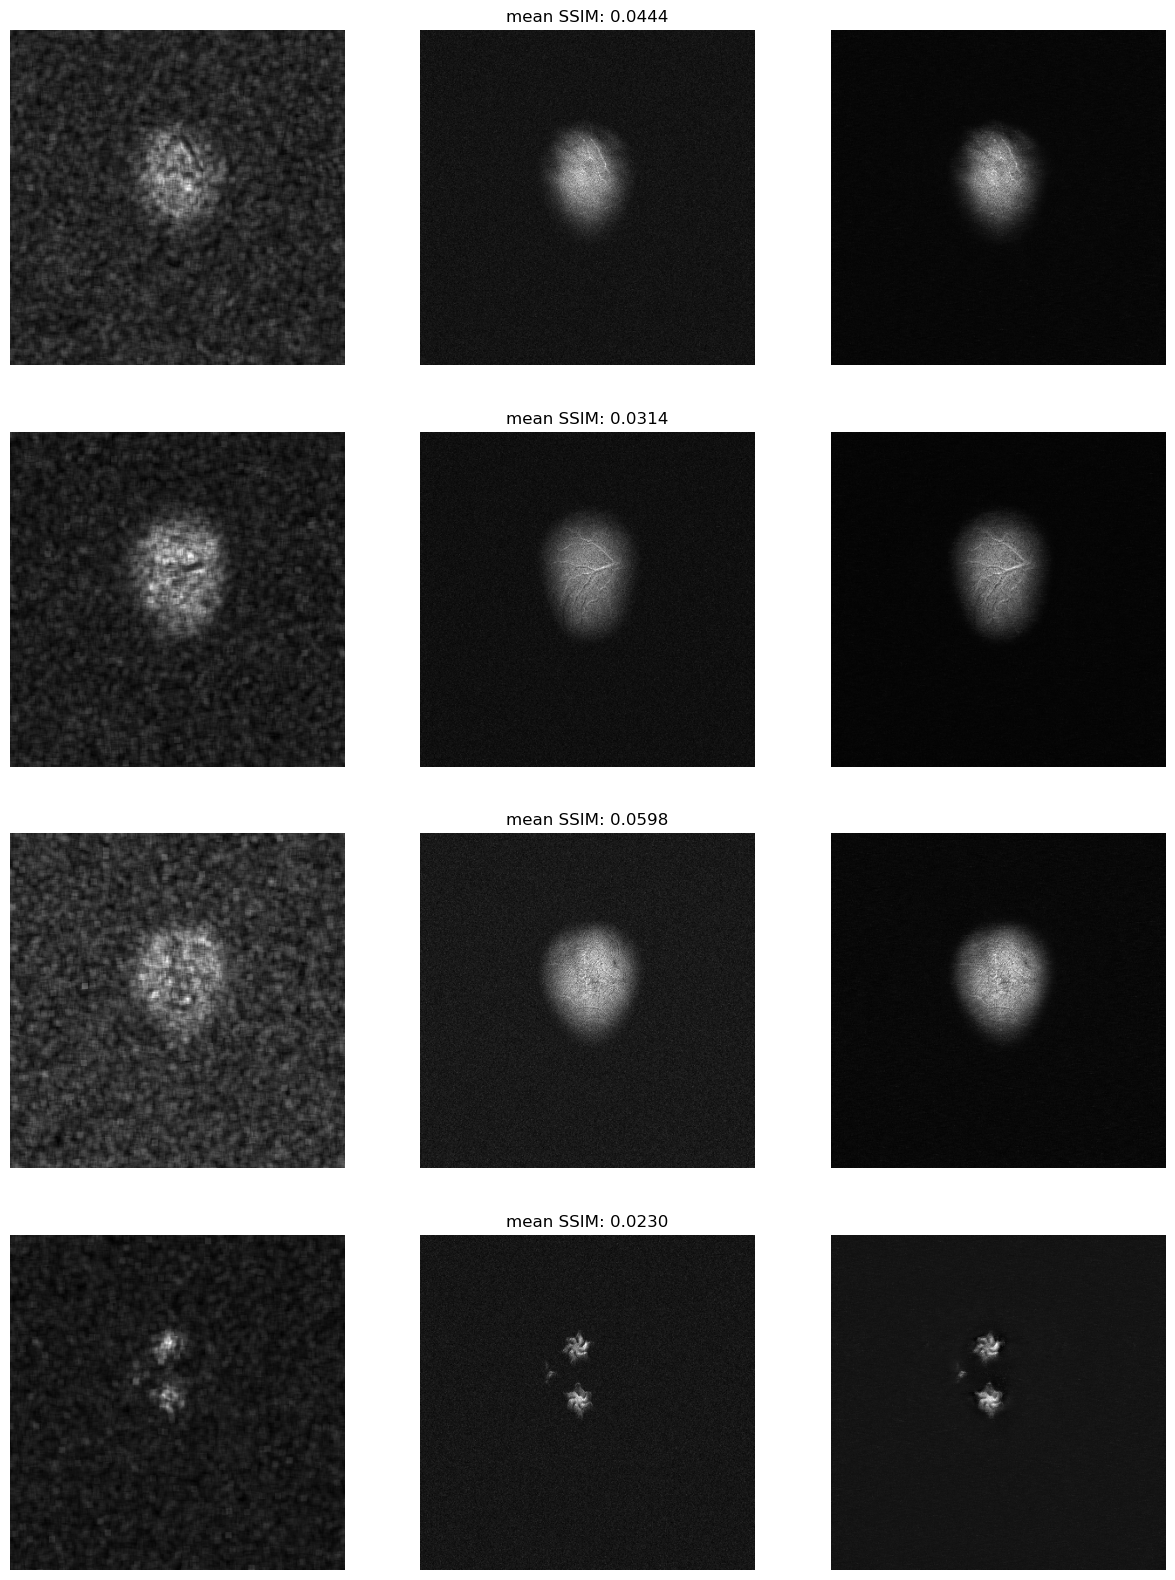

In [19]:
# SSIM 마스크가 적용되지 않았을 때 SSIM loss가 높은 데이터 시각화 
from graph import SSIM_by_pixel, parse, reconstruction_slice
import matplotlib.pyplot as plt
import random
import torch

huge_loss_files = [[filename, slice] for filename, dictionary in ssim_log[0].items() for slice, ssim in dictionary.items() if ssim > 0.2]

sample = 4
fig, ax = plt.subplots(sample, 3, figsize = (3*5, sample*5))

random.shuffle(huge_loss_files)
for i, [filename, slice] in enumerate(huge_loss_files[:sample]):
    

    netname = 'test_6125_59_ver2'
    image_fname = '../../home/Data/val/image/' + filename
    kspace_fname = '../../home/Data/val/kspace/' + filename

    mask_mode = 'equispaced'
    mask_acc = 5

    args = parse(['-n', netname, '--mask_mode', mask_mode, '--acc_weight', f'{{"{mask_acc}":"1"}}'])
    args.acc_weight = {int(k):int(v) for k, v in args.acc_weight.items()}
    args.image_fname = image_fname
    args.kspace_fname = kspace_fname
    args.dataslice = slice
    args.use_SSIM_mask = False

    ssim_graph = SSIM_by_pixel(args)
    

    device = torch.device(f'cuda:{0}' if torch.cuda.is_available() else 'cpu')
    torch.cuda.set_device(device)
    recon, target, _ = reconstruction_slice(args, device)
    ax[i, 1].imshow(target.squeeze().cpu(), cmap = 'gray')
    ax[i, 1].set_xlabel('original')
    ax[i, 2].imshow(recon.squeeze().cpu(), cmap = 'gray')
    ax[i, 2].set_xlabel('reconstruction')

    ax[i, 0].imshow(ssim_graph, cmap='gray')
    ax[i, 0].set_xlabel('SSIM')
    ax[i, 1].set_title(f"mean SSIM: {ssim_graph.mean():.4f}")

for i in range(sample*3):
    ax[i//3, i%3].axis('off')

- 왼쪽부터 SSIM, 원본, reconstruction
- 뭔가 이상함

## Temp

In [9]:
huge_loss_files = [[filename, slice] for filename, dictionary in ssim_log[0].items() for slice, ssim in dictionary.items() if ssim > 0.2]
huge_loss_files

[['brain_acc4_119.h5', 13],
 ['brain_acc4_120.h5', 14],
 ['brain_acc4_120.h5', 15],
 ['brain_acc4_122.h5', 14],
 ['brain_acc4_122.h5', 15],
 ['brain_acc4_124.h5', 15],
 ['brain_acc4_128.h5', 15],
 ['brain_acc4_129.h5', 14],
 ['brain_acc4_129.h5', 15],
 ['brain_acc4_131.h5', 14],
 ['brain_acc4_131.h5', 15],
 ['brain_acc4_132.h5', 14],
 ['brain_acc4_132.h5', 15],
 ['brain_acc4_135.h5', 15],
 ['brain_acc5_119.h5', 15],
 ['brain_acc5_122.h5', 15],
 ['brain_acc5_124.h5', 15],
 ['brain_acc5_125.h5', 15],
 ['brain_acc5_126.h5', 15],
 ['brain_acc5_128.h5', 15],
 ['brain_acc5_130.h5', 15],
 ['brain_acc5_134.h5', 15],
 ['brain_acc8_121.h5', 15],
 ['brain_acc8_122.h5', 13],
 ['brain_acc8_124.h5', 15],
 ['brain_acc8_127.h5', 15],
 ['brain_acc8_130.h5', 14],
 ['brain_acc8_130.h5', 15],
 ['brain_acc8_131.h5', 15],
 ['brain_acc8_133.h5', 15],
 ['brain_acc8_137.h5', 14],
 ['brain_acc8_137.h5', 15]]

In [70]:
netname = 'test_6125_59_ver2'
image_fname = '../../home/Data/val/image/' + 'brain_acc4_119.h5'
kspace_fname = '../../home/Data/val/kspace/' + 'brain_acc4_119.h5'

mask_mode = 'equispaced'
mask_acc = 5

slice = 13

args = parse(['-n', netname, '--mask_mode', mask_mode, '--acc_weight', f'{{"{mask_acc}":"1"}}'])
args.acc_weight = {int(k):int(v) for k, v in args.acc_weight.items()}
args.image_fname = image_fname
args.kspace_fname = kspace_fname
args.dataslice = slice
args.use_SSIM_mask = False

ssim_graph = SSIM_by_pixel(args)

/home/mjk32384/root/FastMRI_challenge/graph.py:152: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(args.exp_dir / 'best_model.pt', map_location='cpu')

0.020372689


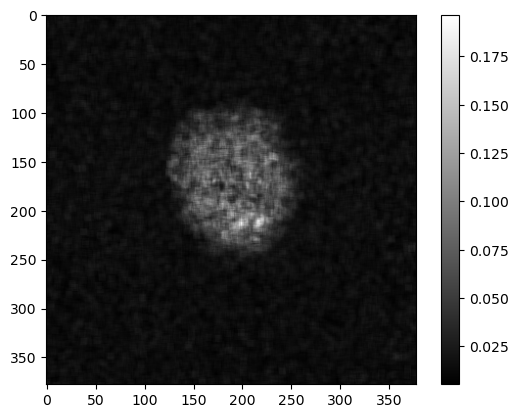

In [10]:
plt.imshow(ssim_graph, cmap = 'gray')
plt.colorbar()
print(ssim_graph.mean())

In [11]:
ssim_log[0]['brain_acc4_119.h5'][13]

np.float64(0.2405598201995427)

In [64]:
ssim_log[0]

defaultdict(dict,
            {'brain_acc4_119.h5': {0: np.float64(0.03777658532302608),
              1: np.float64(0.032449523204501785),
              2: np.float64(0.041421890431908026),
              3: np.float64(0.042123381371631075),
              4: np.float64(0.04034281968953635),
              5: np.float64(0.04024706274610579),
              6: np.float64(0.03658005340826653),
              7: np.float64(0.04464599316587892),
              8: np.float64(0.04544141040836214),
              9: np.float64(0.05309829557300072),
              10: np.float64(0.059588332477860995),
              11: np.float64(0.09214747017570935),
              12: np.float64(0.16376529954248065),
              13: np.float64(0.2405598201995427)},
             'brain_acc4_120.h5': {0: np.float64(0.025724963177168547),
              1: np.float64(0.025984607708470442),
              2: np.float64(0.02415270481864229),
              3: np.float64(0.03229668811044972),
              4: np.float64(0.

# Hyperparmeter optimization

## acc_weight

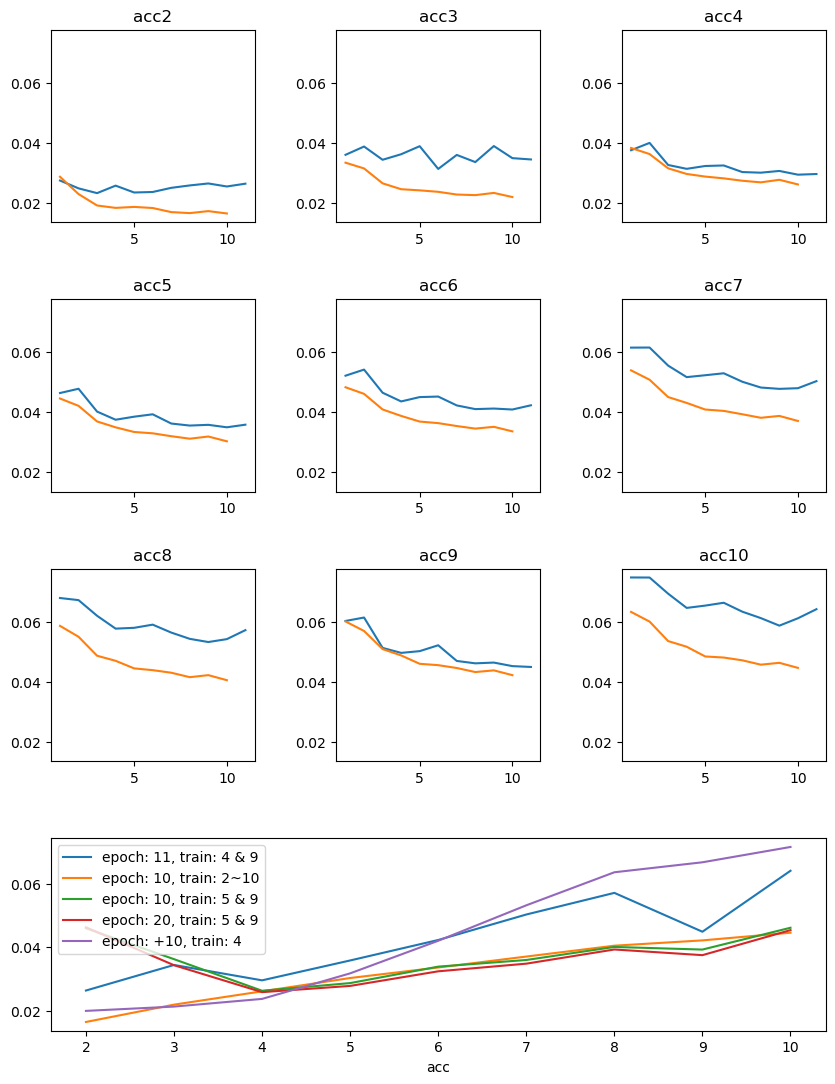

In [14]:
import numpy as np
from graph import graph_val_loss
data1 = np.load('../result/test_6125_49/val_loss_log.npy')
data2 = np.load("../result/test_6125_all/val_loss_log.npy")
data3 = np.array([[9, np.float64(0.04601727093477229), np.float64(0.03626300534006095), np.float64(0.0262885710147725), np.float64(0.028713517737531214), np.float64(0.03390628819063639), np.float64(0.03600809936728093), np.float64(0.040121493856843105), np.float64(0.0392952266675176), np.float64(0.04618529515061028)]])
data4 = np.array([[19, np.float64(0.04633077281471706), np.float64(0.03435614866826732), np.float64(0.0258490154770886), np.float64(0.02781905165212676), np.float64(0.0324305737952868), np.float64(0.03484625082573474), np.float64(0.03932079564284755), np.float64(0.03753225272924822), np.float64(0.04543607138319019)]])
data5 = np.load("../result/test_6125_59_ver3/val_loss_log.npy")
graph_val_loss([data1, data2, data3, data4, data5],
               ['epoch: 11, train: 4 & 9', 'epoch: 10, train: 2~10',
                'epoch: 10, train: 5 & 9', 'epoch: 20, train: 5 & 9','epoch: +10, train: 4'])

- 일단 균등하게 넣은 것이 val loss가 괜찮은 것 같아서 균등하게 더 돌려봄

## use_SSIM_mask_train

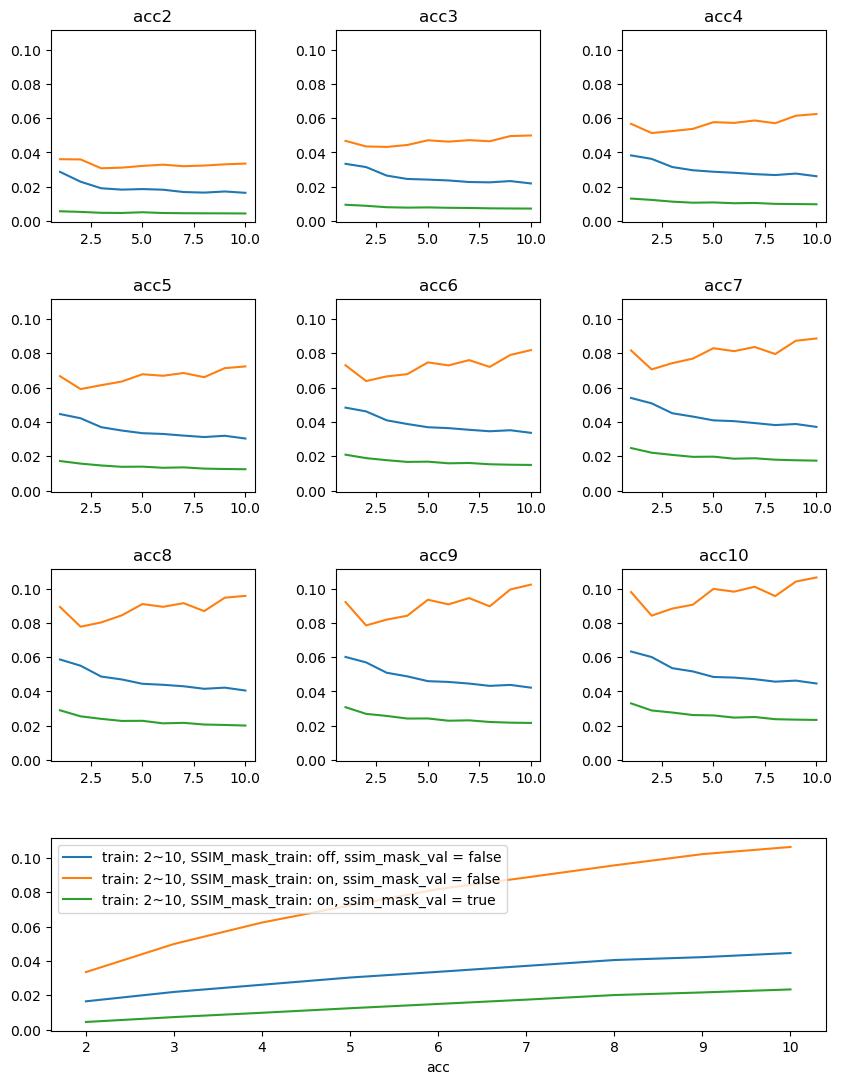

In [3]:
import numpy as np
from graph import graph_val_loss
data1 = np.load("../result/test_6125_all/val_loss_log.npy")
data2 = np.load("../result/test_6125_all_ssim_mask/val_loss_log.npy")
data3 = np.load("../result/test_6125_all_ssim_mask/val_loss_mask_log.npy")
graph_val_loss([data1, data2, data3],
               ['train: 2~10, SSIM_mask_train: off, ssim_mask_val = false',
                'train: 2~10, SSIM_mask_train: on, ssim_mask_val = false',
                'train: 2~10, SSIM_mask_train: on, ssim_mask_val = true'])

- ssim_mask없이 validation한 경우, ssim_mask_train = False인 것이 더 나음 -> 어떻게 보면 당연함
- ssim_mask_val = True인 경우가 ssim_mask_val = False인 경우보다 나음 -> 당연함
- ssim_mask_train = Fasle인 경우에 ssim_mask_val = True인 데이터를 만들지 못해서, 제대로 비교가 안 됨 

SSIM_mask_train = False:

Leaderboard SSIM : 0.9706  
========== Details ==========  
Leaderboard SSIM (public): 0.9786  
Leaderboard SSIM (private): 0.9626   

SSIM_mask_train = True:

Leaderboard SSIM : 0.9743  
========== Details ==========  
Leaderboard SSIM (public): 0.9810  
Leaderboard SSIM (private): 0.9677  

- leaderboard 값으로 비교해보니 SSIM_mask_train = True가 훨씬 나은듯?

## mask_mode

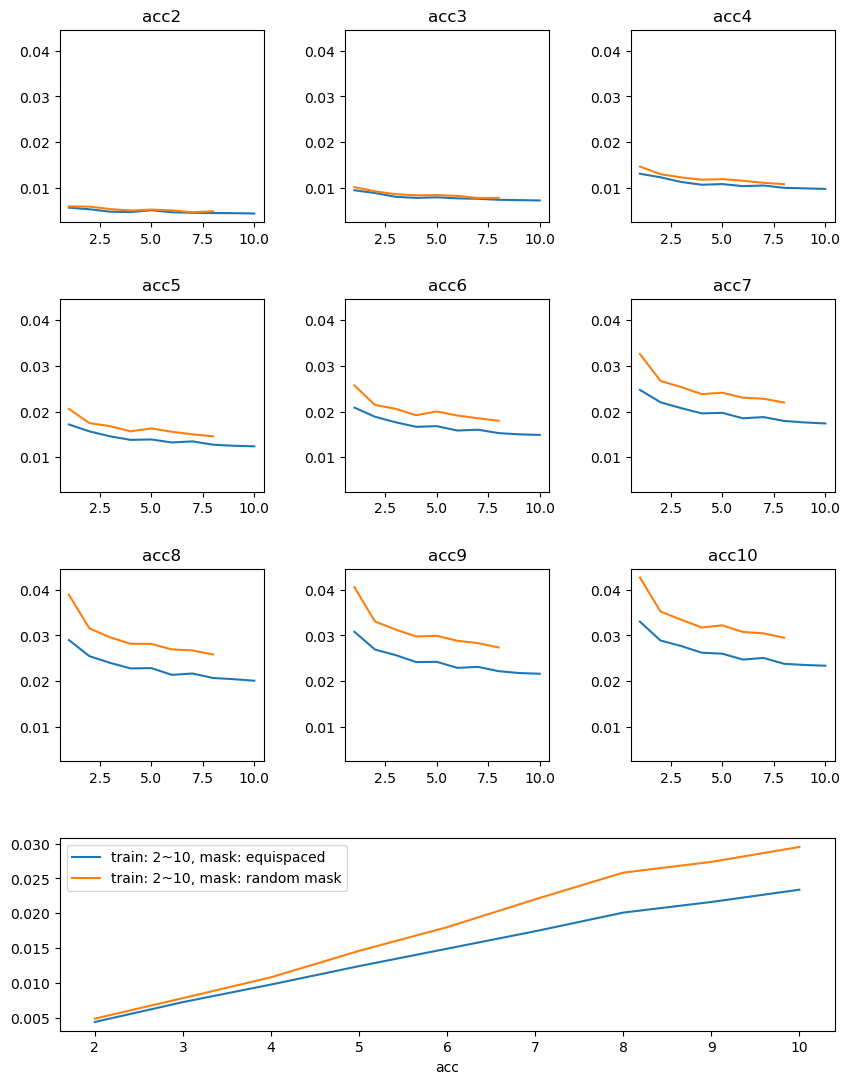

In [6]:
import numpy as np
from graph import graph_val_loss
data1 = np.load("../result/test_6125_all/val_loss_log.npy")
data2 = np.load("../result/test_6125_all_ssim_mask/val_loss_mask_log.npy")
data3 = np.load("../result/test_6125_all_ssim_mask_random/val_loss_mask_log.npy")
graph_val_loss([data2, data3], ['train: 2~10, mask: equispaced','train: 2~10, mask: random mask'])

- equispaced의 성능이 더 좋은듯?

In [41]:
import os
import numpy as np
from pathlib import Path
names = [p.name for p in Path("../result/").iterdir() if p.is_dir()]
names.remove('.git')
space = max([len(name) for name in names])
print("Epochs:")
for net in names:
    print(f"{net}{int(np.load(f'../result/{net}/val_loss_log.npy')[-1,0]):{space-len(net)+6}}")

Epochs:
test_Varnet               35
test_6125                 19
test_6125_9                9
test_6125_all              9
test_894_varnet            4
test_7136                  9
temp                       1
test_894_varnet_2         17
test_6125_59_ver2         19
test_6125_49              10
test_6125_59_ver3         29
test_6125_shuffled         9
test_6125_59               9
test_simplified_varnet     0
